In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('CensusIncomeData.csv',delimiter=',',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
0     32561 non-null int64
1     32561 non-null object
2     32561 non-null int64
3     32561 non-null object
4     32561 non-null int64
5     32561 non-null object
6     32561 non-null object
7     32561 non-null object
8     32561 non-null object
9     32561 non-null object
10    32561 non-null int64
11    32561 non-null int64
12    32561 non-null int64
13    32561 non-null object
14    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
column_labels=['Sl.NO','age','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','Income']
data.columns=column_labels

In [6]:
data.head()

,Sl.NO,age,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
data.drop(['Sl.NO'],axis=1,inplace=True)

In [8]:
data.head(20)

,age,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [9]:
#Copy categorical data
data_cat = data[['age', 'education','marital-status',
                       'occupation','relationship','race',
                       'sex',
                       'native-country', 'Income']].copy()
data_cat.head()

,age,education,marital-status,occupation,relationship,race,sex,native-country,Income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [10]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import pandas as pd
le=LabelEncoder()
data_cat['Income']=le.fit_transform(data_cat['Income'])
data_cat.head()

,age,education,marital-status,occupation,relationship,race,sex,native-country,Income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0


In [11]:
data_cat = pd.get_dummies(data_cat)
data_cat.head()
data_cat.shape

(32561, 103)

In [12]:
#copy numerical data
data_uc = data[['fnlwgt','education-num','capital-gain', 
                       'capital-loss', 'hours-per-week']].copy()
data_uc.head()

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,77516,13,2174,0,40
1,83311,13,0,0,13
2,215646,9,0,0,40
3,234721,7,0,0,40
4,338409,13,0,0,40


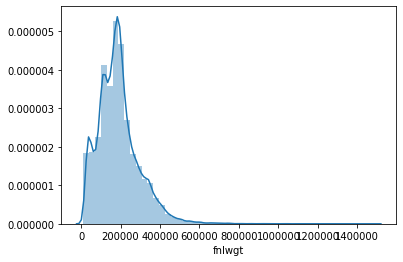

In [13]:
sns.distplot(data_uc['fnlwgt'])

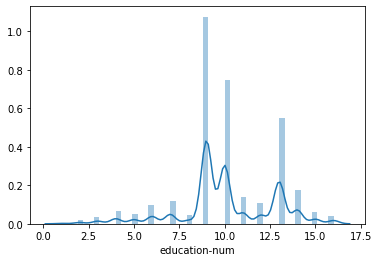

In [14]:
sns.distplot(data_uc['education-num'])

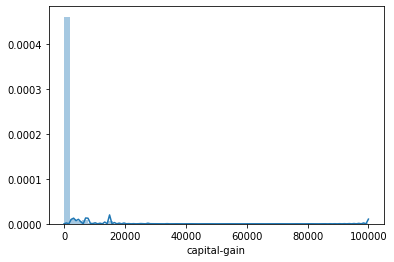

In [15]:
sns.distplot(data_uc['capital-gain'])

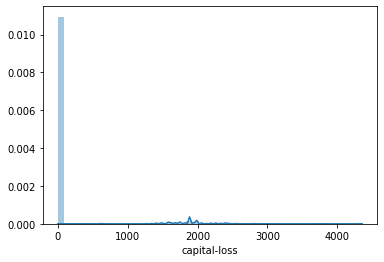

In [16]:
sns.distplot(data_uc['capital-loss'])

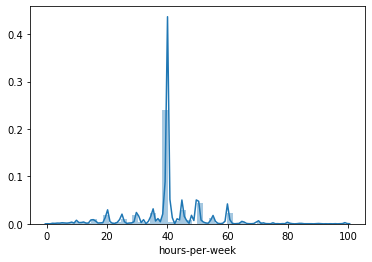

In [17]:
sns.distplot(data_uc['hours-per-week'])

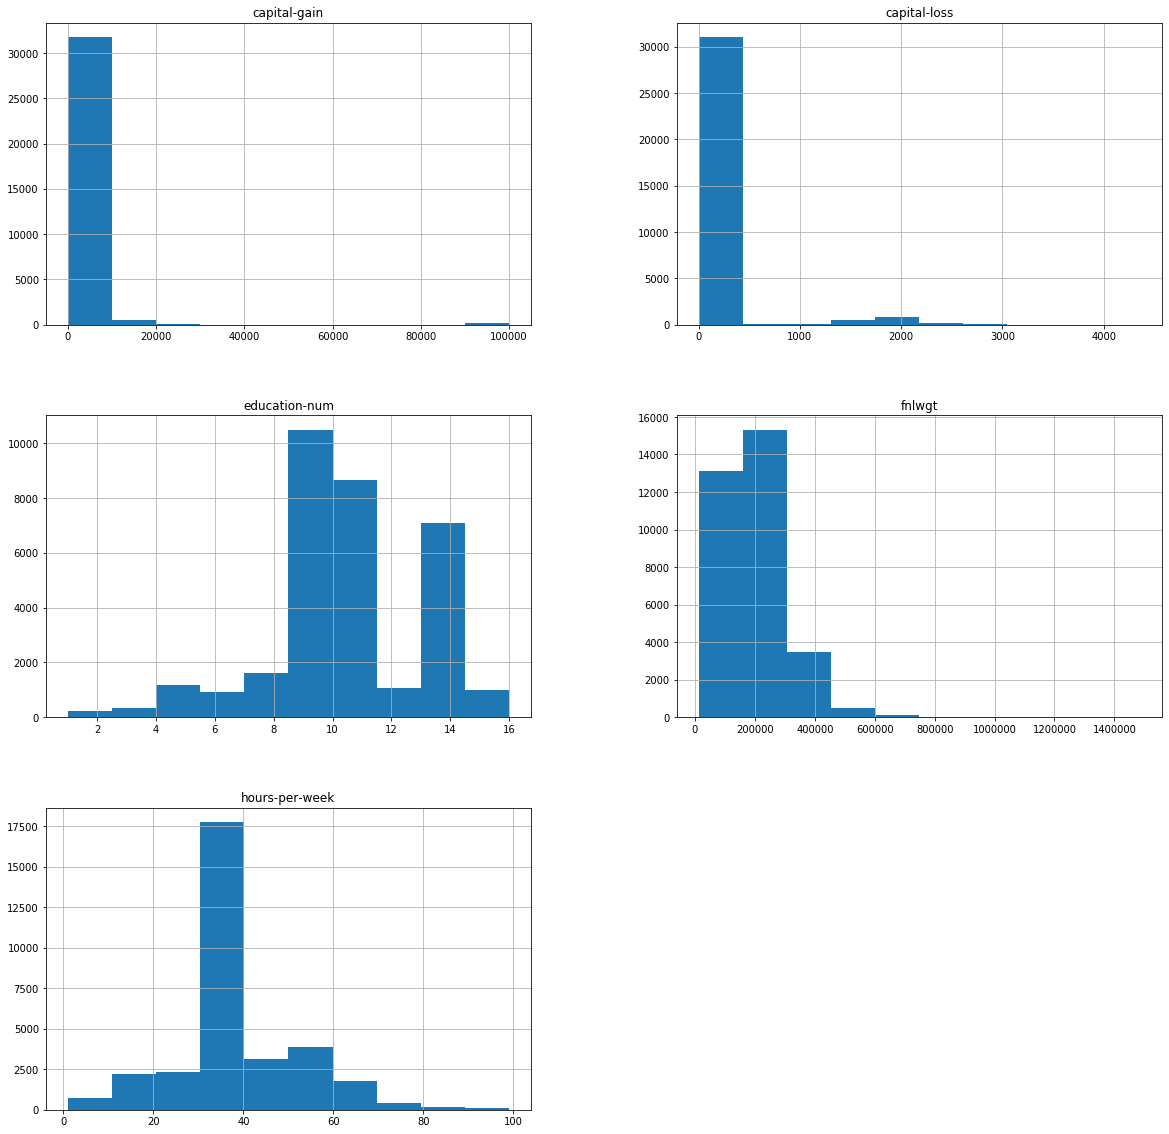

In [18]:
data_uc.hist(figsize=(20,20))
plt.show()

In [19]:
data_uc_log=np.log(data_uc+0.1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000236CD554DC8>,
      dtype=object)

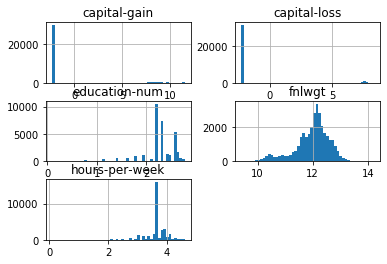

In [20]:
data_uc_log.hist(bins=50)

In [21]:
data_uc_log1=data_uc_log*100

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000236CDB7A148>,
      dtype=object)

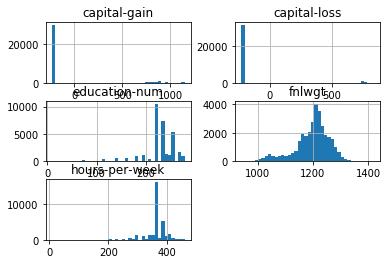

In [22]:
data_uc_log1.hist(bins=40)

In [23]:
data_uc1=(data_uc_log1+1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000236CDD79708>,
      dtype=object)

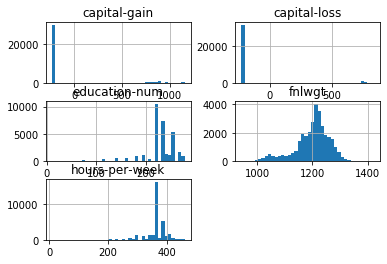

In [24]:
data_uc1.hist(bins=40)

In [25]:
data_uc1.corr()

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
fnlwgt,1.000000,-0.045777,-0.000774,-0.004106,-0.006266
education-num,-0.045777,1.000000,0.103409,0.062364,0.107859
capital-gain,-0.000774,0.103409,1.000000,-0.066353,0.067562
capital-loss,-0.004106,0.062364,-0.066353,1.000000,0.042236
hours-per-week,-0.006266,0.107859,0.067562,0.042236,1.000000


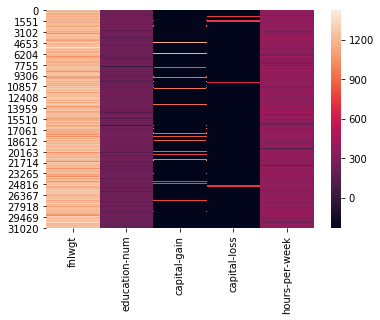

In [26]:
sns.heatmap(data_uc1)

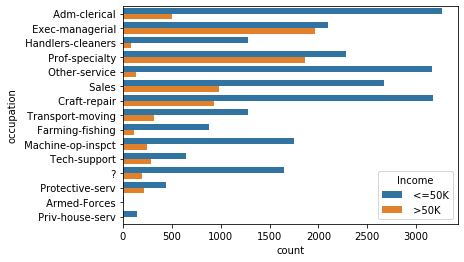

In [27]:
sns.countplot(y='occupation', hue='Income', data=data)
#adm-clerical were higest people with <=50k,and exec-managerial were highest with >=50k

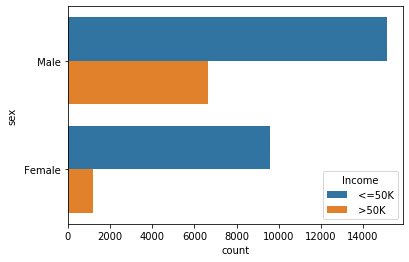

In [28]:
sns.countplot(y='sex', hue='Income', data=data)
#male earned well in both categories

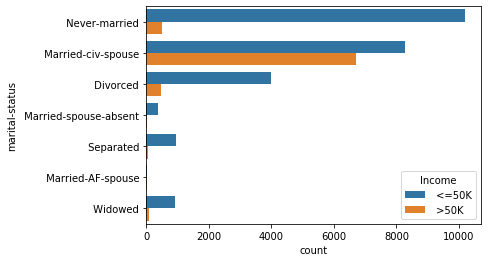

In [29]:
sns.countplot(y='marital-status', hue='Income', data=data)
#never married young guys earned less
#married-civ-spouse people earned high

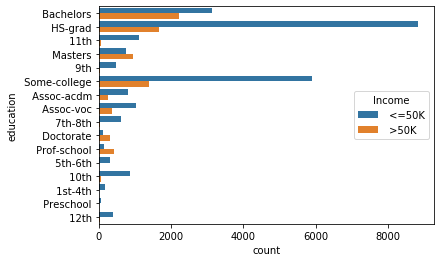

In [30]:
sns.countplot(y='education', hue='Income', data=data)
# with the help of countplots we are able identify 
#Bachelors degree holding people earned high(>=50k,preschool were least)

In [31]:
data_final = pd.concat([data_uc1, data_cat], axis=1)
data_final.head()

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income,age_ ?,age_ Federal-gov,age_ Local-gov,age_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,1126.824094,258.261223,769.437006,-229.258509,370.137633,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1134.033707,258.261223,-229.258509,-229.258509,258.261223,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1229.139392,221.827441,-229.258509,-229.258509,370.137633,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1237.615328,197.009478,-229.258509,-229.258509,370.137633,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1274.201080,258.261223,-229.258509,-229.258509,370.137633,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data_final.shape

(32561, 108)

In [33]:
df_x= data_final.drop(columns=["Income"])
df_x.head()

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,age_ ?,age_ Federal-gov,age_ Local-gov,age_ Never-worked,age_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,1126.824094,258.261223,769.437006,-229.258509,370.137633,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1134.033707,258.261223,-229.258509,-229.258509,258.261223,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1229.139392,221.827441,-229.258509,-229.258509,370.137633,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1237.615328,197.009478,-229.258509,-229.258509,370.137633,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1274.201080,258.261223,-229.258509,-229.258509,370.137633,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [34]:
y=data_final['Income']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int32

In [35]:
#sacaling down using standardscaler
from sklearn.preprocessing import MinMaxScaler
MS = MinMaxScaler(feature_range=(0, 5))
x=MS.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,age_ ?,age_ Federal-gov,age_ Local-gov,age_ Never-worked,age_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,1.921020,4.615788,3.614402,0.0,3.994902,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
1,1.996205,4.615788,0.000000,0.0,2.752057,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
2,2.988008,3.936943,0.000000,0.0,3.994902,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
3,3.076399,3.474526,0.000000,0.0,3.994902,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
4,3.457931,4.615788,0.000000,0.0,3.994902,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,3.172187,4.467835,0.000000,0.0,3.938065,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
32557,2.639428,3.936943,0.000000,0.0,3.994902,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
32558,2.622648,3.936943,0.000000,0.0,3.994902,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
32559,2.917201,3.936943,0.000000,0.0,3.227645,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss,accuracy_score,confusion_matrix,classification_report

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [39]:
model=[LogisticRegression(),SVC(),GaussianNB(),MultinomialNB(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]

In [40]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('fscore of',m,'is')
    print('roc_auc_score',m,'is')
    print('Accuracy score of',m,'is')
    print(f1_score(y_test,predm))
    print(roc_auc_score(y_test,predm))
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

fscore of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is
roc_auc_score LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is
Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
              

In [41]:
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier()
knnscores = cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.8208199  0.81910319 0.82417076 0.82585995 0.8252457 ]
0.8230399011087635 0.002627666224766313


In [42]:
from sklearn.model_selection import cross_val_score
dt=DecisionTreeClassifier()
dtscores = cross_val_score(dt,x,y,cv=5)
print(dtscores)
print(dtscores.mean(),dtscores.std())

[0.80055274 0.80973587 0.80635749 0.80835381 0.81280713]
0.8075614080853601 0.004085206728432554


In [43]:
from sklearn.model_selection import cross_val_score
SM=SVC()
SMscores = cross_val_score(SM,x,y,cv=5)
print(SMscores)
print(SMscores.mean(),SMscores.std())

[0.8377092  0.83737715 0.84382678 0.83891278 0.84336609]
0.840238399594687 0.0027928424360065865


In [44]:
from sklearn.model_selection import cross_val_score
lr=LogisticRegression()
lrscores = cross_val_score(lr,x,y,cv=5)
print(lrscores)
print(lrscores.mean(),lrscores.std())

[0.83939813 0.84198403 0.84275184 0.84551597 0.84628378]
0.8431867506717806 0.0024902302302861846


In [45]:
from sklearn.model_selection import cross_val_score
rf=RandomForestClassifier()
rfscores = cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.83141409 0.83645577 0.83246314 0.83937346 0.83507371]
0.8349560376506485 0.0028473351445456813


In [46]:
from sklearn.model_selection import KFold


In [47]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(x_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)

best params: LogisticRegression(C=0.040999999999999995, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 0.040999999999999995}
best score: 0.8957669132303052


Text(0.5, 257.44, 'Predicted label')

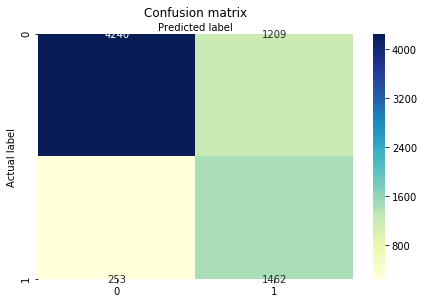

In [48]:
#Evaluation
## Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(x_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [49]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(x_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 79.59


In [50]:
log_opt.fit(x_train, y_train)
print(classification_report(y_test, log_opt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      5449
           1       0.55      0.85      0.67      1715

    accuracy                           0.80      7164
   macro avg       0.75      0.82      0.76      7164
weighted avg       0.85      0.80      0.81      7164



In [51]:
log_opt.fit(x_train, y_train) # fit optimised model to the training data
probality = log_opt.predict_proba(x_test) # predict probabilities
probality = probality[:, 1] # we will only keep probabilities associated with the 
logit_roc_auc = roc_auc_score(y_test, probality) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)
#slight increase in AUC score

AUC score: 0.900


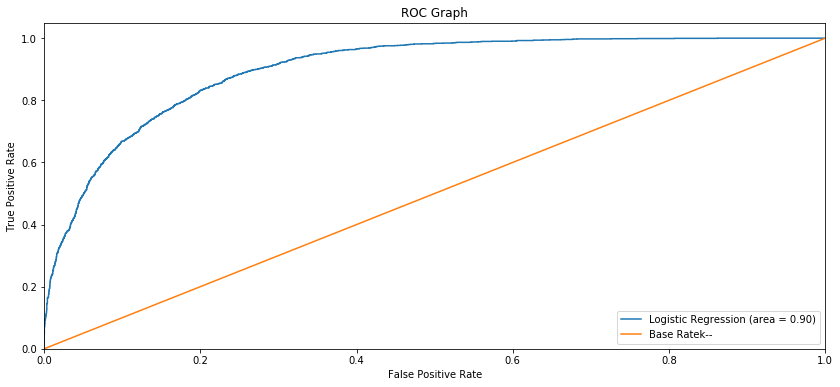

In [52]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(x_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#AOC is better metrics to measure the model with this we can adopt logisticregression model since it yeilded 90%result no need 
#analyse other classifier in my opinion
